# Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Peoples_Climate_Vote_Database_2024.csv")

In [3]:
# Filter for country-level aggregates only (ignoring demographic breakdowns for now)
df_filtered = df[
    (df['Age'] == 'All Ages') &
    (df['Education'] == 'All Education') &
    (df['Country'] != 'Global')
].copy()

In [4]:
# Create a composite feature name (Question + Response) to pivot on
df_filtered['feature'] = df_filtered['Question Text (Short)'] + "_" + df_filtered['Response']

In [5]:
# Pivot: Rows = Countries, Cols = Response Weighted Means
# This creates our feature matrix
df_pivot = df_filtered.pivot(index='Country', columns='feature', values='Weighted Mean')

In [6]:
# Drop any accidental nulls (though there shouldn't be any in this clean subset)
df_pivot = df_pivot.dropna()

In [14]:
df_pivot.head()

feature,Big businesses performance_Don't know,Big businesses performance_Neither well nor badly,Big businesses performance_Somewhat badly,Big businesses performance_Somewhat well,Big businesses performance_Very badly,Big businesses performance_Very well,Countries working together_Don't know,Countries working together_It doesn't matter - no country should work on climate change,Countries working together_No - they should work separately,Countries working together_Yes - they should work together despite their disagreements,...,Worry for next generation_Don't know,Worry for next generation_Extremely,Worry for next generation_Not at all,Worry for next generation_Not very,Worry for next generation_Somewhat,Worry for next generation_Very,Cluster,PCA1,PCA2,Region
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.0,18.0,10.0,25.0,16.0,23.0,2.0,1.0,3.0,94.0,...,4.0,33.0,5.0,2.0,21.0,36.0,2,2.270223,-3.406935,Asia
Algeria,23.0,35.0,17.0,11.0,12.0,2.0,2.0,2.0,11.0,85.0,...,3.0,21.0,17.0,9.0,26.0,24.0,2,1.370602,-0.580412,Africa
Argentina,14.0,25.0,29.0,14.0,17.0,1.0,7.0,2.0,5.0,86.0,...,0.0,10.0,5.0,11.0,38.0,35.0,0,-3.359718,4.161321,Americas
Australia,13.0,19.0,18.0,17.0,21.0,12.0,3.0,3.0,7.0,87.0,...,1.0,18.0,13.0,13.0,26.0,29.0,1,-5.613982,-2.156244,Oceania
Bangladesh,5.0,26.0,15.0,32.0,7.0,15.0,1.0,0.0,5.0,94.0,...,1.0,6.0,11.0,10.0,38.0,33.0,2,2.654918,0.713425,Asia


In [7]:
# 2. Preprocessing & PCA
# ---------------------------------------------------------
# Standardize the data (Mean=0, Std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot)

In [8]:
# Run PCA for visualization (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means

In [9]:
# 3. K-Means Clustering
# ---------------------------------------------------------
# I checked silhouette scores for k=2 to k=10. 
# k=3 was chosen as the best balance of statistical fit and interpretability.
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Attach results back to the dataframe
df_pivot['Cluster'] = cluster_labels
df_pivot['PCA1'] = X_pca[:, 0]
df_pivot['PCA2'] = X_pca[:, 1]

In [11]:
# 4. Region Mapping (for visualization context)
# ---------------------------------------------------------
# Manually mapping countries to regions to see if clusters align geographically
region_map = {
    'Afghanistan': 'Asia', 'Algeria': 'Africa', 'Argentina': 'Americas', 'Australia': 'Oceania',
    'Bangladesh': 'Asia', 'Barbados': 'Americas', 'Benin': 'Africa', 'Bhutan': 'Asia',
    'Brazil': 'Americas', 'Burkina Faso': 'Africa', 'Cambodia': 'Asia', 'Canada': 'Americas',
    'China': 'Asia', 'Colombia': 'Americas', 'Comoros (the)': 'Africa', "Côte d'Ivoire": 'Africa',
    'Czechia': 'Europe', 'Dominican Republic (the)': 'Americas', 'Democratic Republic of the Congo': 'Africa',
    'Ecuador': 'Americas', 'Egypt': 'Africa', 'El Salvador': 'Americas', 'Ethiopia': 'Africa',
    'Fiji': 'Oceania', 'France': 'Europe', 'Germany': 'Europe', 'Ghana': 'Africa',
    'Greece': 'Europe', 'Guatemala': 'Americas', 'Haiti': 'Americas', 'Honduras': 'Americas',
    'India': 'Asia', 'Indonesia': 'Asia', 'Iran (Islamic Republic of)': 'Asia', 'Iraq': 'Asia',
    'Italy': 'Europe', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia', 'Lao PDR': 'Asia', 'Madagascar': 'Africa', 'Mexico': 'Americas',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Nepal': 'Asia',
    'Nicaragua': 'Americas', 'Niger (the)': 'Africa', 'Nigeria': 'Africa', 'Pakistan': 'Asia',
    'Papua New Guinea': 'Oceania', 'Paraguay': 'Americas', 'Peru': 'Americas', 'Philippines (the)': 'Asia',
    'Republic of Korea (the)': 'Asia', 'Romania': 'Europe', 'Russian Federation (the)': 'Europe',
    'Samoa': 'Oceania', 'Saudi Arabia': 'Asia', 'Solomon Islands': 'Oceania', 'South Africa': 'Africa',
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan (the)': 'Africa', 'Tanzania (the United Republic of)': 'Africa',
    'Tunisia': 'Africa', 'Uganda': 'Africa', 'United Kingdom of Great Britain and Northern Ireland (the)': 'Europe',
    'United States of America (the)': 'Americas', 'Vanuatu': 'Oceania', 'Zimbabwe': 'Africa'
}
df_pivot['Region'] = df_pivot.index.map(region_map)

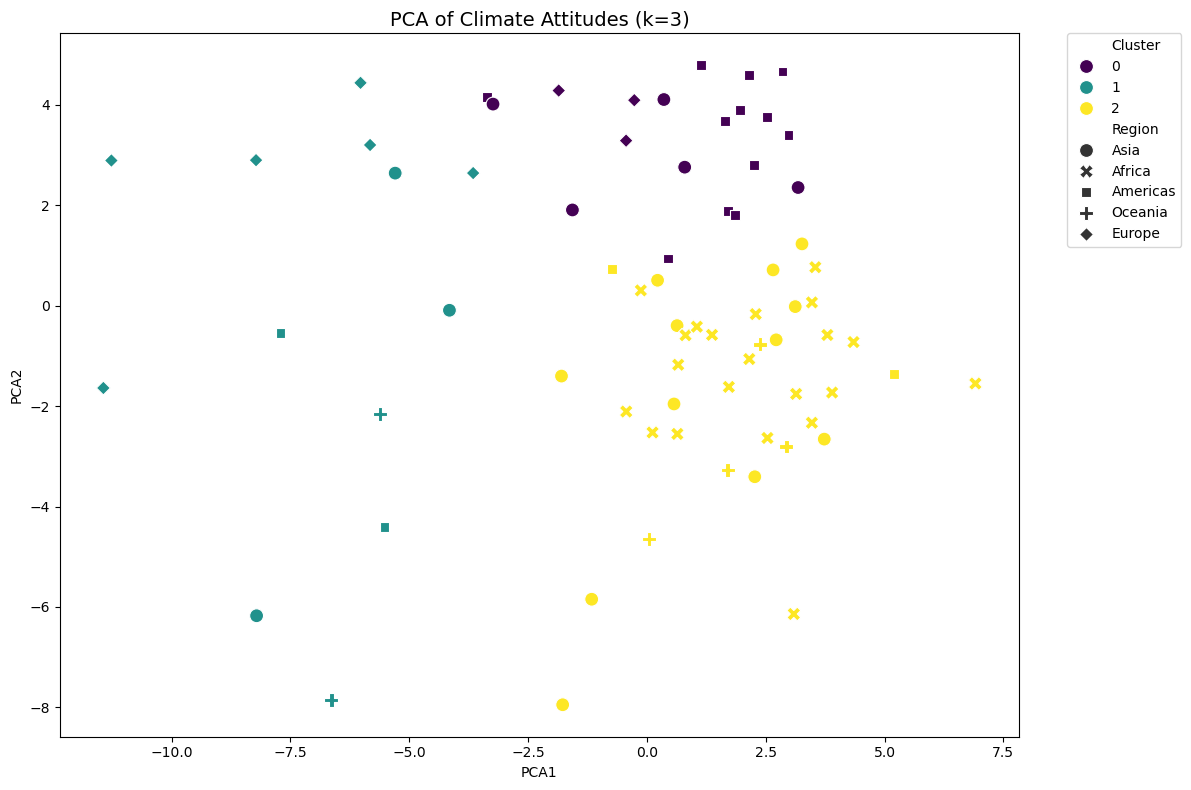

In [12]:
# 5. Visualization
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_pivot, 
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    style='Region', 
    palette='viridis', 
    s=100
)
plt.title(f'PCA of Climate Attitudes (k={best_k})', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [13]:
# 6. Interpretation
# ---------------------------------------------------------
# We interpret clusters by looking at which features deviate most from the global mean
global_mean = df_pivot.drop(columns=['Cluster', 'PCA1', 'PCA2']).mean(numeric_only=True)

for cluster in range(best_k):
    cluster_data = df_pivot[df_pivot['Cluster'] == cluster]
    cluster_mean = cluster_data.drop(columns=['Cluster', 'PCA1', 'PCA2']).mean(numeric_only=True)
    diff = cluster_mean - global_mean
    
    print(f"\n--- Cluster {cluster} ({len(cluster_data)} countries) ---")
    print(f"Typical countries: {cluster_data.index.tolist()[:5]}")
    print("\nDistinctive Features (Higher than Average):")
    print(diff.sort_values(ascending=False).head(5))
    print("\nDistinctive Features (Lower than Average):")
    print(diff.sort_values(ascending=True).head(5))


--- Cluster 0 (20 countries) ---
Typical countries: ['Argentina', 'Brazil', 'Cambodia', 'Colombia', 'Dominican Republic (the)']

Distinctive Features (Higher than Average):
feature
Renewable energy transition_Somewhat quickly       10.652778
Effects on big decisions_A little                   8.477778
Country performance_Somewhat badly                  8.241667
Big businesses performance_Somewhat badly           7.508333
Protection from extreme weather_More protection     7.277778
dtype: float64

Distinctive Features (Lower than Average):
feature
Renewable energy transition_Very quickly       -8.433333
Country performance_Very well                  -8.430556
Worry compared to last year_Less worried       -8.113889
Extreme weather experience_Better than usual   -6.480556
Big businesses performance_Very well           -4.811111
dtype: float64

--- Cluster 1 (13 countries) ---
Typical countries: ['Australia', 'Canada', 'China', 'Czechia', 'France']

Distinctive Features (Higher than Aver

In [15]:
# 4. Print the list of countries by cluster
print("\n--- Country Typology (K-Means, k=3) ---")
for i in range(3):
    countries = df_pivot[df_pivot['Cluster'] == i].index.tolist()
    
    # Use the cluster interpretation from our analysis for labeling
    if i == 0:
        label = "Cluster 0: The Critical Realists (Latin America / Southern Europe)"
    elif i == 1:
        label = "Cluster 1: The Passive Observers (Industrialized North / Major Emitters)"
    else:
        label = "Cluster 2: The Loyal Demanders (Africa / Asia / Global South)"
    
    print(f"\n{label} ({len(countries)} countries):")
    print(", ".join(countries))


--- Country Typology (K-Means, k=3) ---

Cluster 0: The Critical Realists (Latin America / Southern Europe) (20 countries):
Argentina, Brazil, Cambodia, Colombia, Dominican Republic (the), Ecuador, El Salvador, Greece, Guatemala, Honduras, Iraq, Italy, Mexico, Myanmar, Nicaragua, Paraguay, Peru, Philippines (the), Republic of Korea (the), Spain

Cluster 1: The Passive Observers (Industrialized North / Major Emitters) (13 countries):
Australia, Canada, China, Czechia, France, Germany, Indonesia, Japan, Papua New Guinea, Romania, Russian Federation (the), United Kingdom of Great Britain and Northern Ireland (the), United States of America (the)

Cluster 2: The Loyal Demanders (Africa / Asia / Global South) (39 countries):
Afghanistan, Algeria, Bangladesh, Barbados, Benin, Bhutan, Burkina Faso, Comoros (the), Côte d'Ivoire, Democratic Republic of the Congo, Egypt, Ethiopia, Fiji, Ghana, Haiti, India, Iran (Islamic Republic of), Jordan, Kenya, Kyrgyzstan, Lao PDR, Madagascar, Morocco, Moz

# Hierarchical clustering

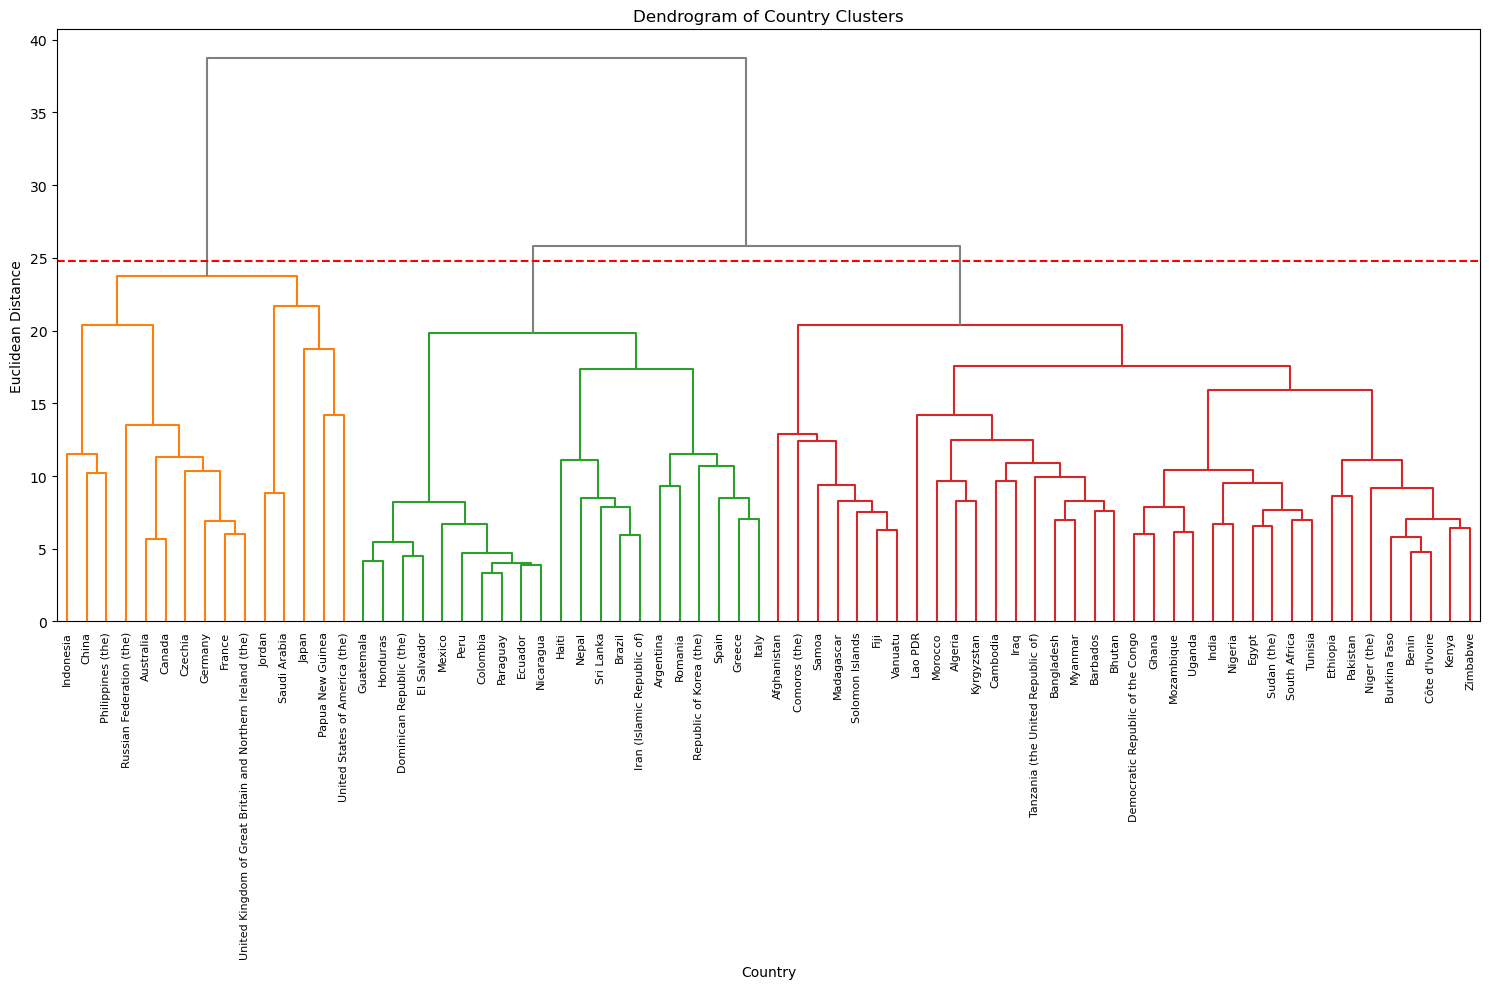

In [36]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Make the plot large enough to read
plt.title("Dendrogram of Country Clusters")

# 1. Calculate Linkage
Z = sch.linkage(X_scaled, method='ward')

# 2. Determine Cut Height for 3 Clusters
cut_height = (Z[-2, 2] + Z[-3, 2]) / 2

# 3. Plot Dendrogram with Labels
dendrogram = sch.dendrogram(
    Z,
    labels=df_pivot.index,       # <--- This replaces the numbers with names
    leaf_rotation=90,            # Vertical text to prevent overlap
    leaf_font_size=8,            # Smaller font to fit all 72 countries
    color_threshold=cut_height,  # Color the 3 clusters distinctively
    above_threshold_color='grey'
)

plt.axhline(y=cut_height, color='r', linestyle='--', label='Cut Threshold')
plt.ylabel('Euclidean Distance')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

In [37]:
# 4. Print the List of Countries by Cluster
print("\n--- Hierarchical Clustering Typology ---")

for i in range(3):
    # Get list of countries in this cluster
    countries = df_pivot[df_pivot['HC_Cluster'] == i].index.tolist()
    
    print(f"\nCluster {i} ({len(countries)} countries):")
    print(", ".join(countries))


--- Hierarchical Clustering Typology ---

Cluster 0 (15 countries):
Australia, Canada, China, Czechia, France, Germany, Indonesia, Japan, Jordan, Papua New Guinea, Philippines (the), Russian Federation (the), Saudi Arabia, United Kingdom of Great Britain and Northern Ireland (the), United States of America (the)

Cluster 1 (36 countries):
Afghanistan, Algeria, Bangladesh, Barbados, Benin, Bhutan, Burkina Faso, Cambodia, Comoros (the), Côte d'Ivoire, Democratic Republic of the Congo, Egypt, Ethiopia, Fiji, Ghana, India, Iraq, Kenya, Kyrgyzstan, Lao PDR, Madagascar, Morocco, Mozambique, Myanmar, Niger (the), Nigeria, Pakistan, Samoa, Solomon Islands, South Africa, Sudan (the), Tanzania (the United Republic of), Tunisia, Uganda, Vanuatu, Zimbabwe

Cluster 2 (21 countries):
Argentina, Brazil, Colombia, Dominican Republic (the), Ecuador, El Salvador, Greece, Guatemala, Haiti, Honduras, Iran (Islamic Republic of), Italy, Mexico, Nepal, Nicaragua, Paraguay, Peru, Republic of Korea (the), Rom

In [25]:
# ---------------------------------------------------------
# 3. Compare with K-Means
# ---------------------------------------------------------
# Create a confusion matrix (crosstab) to see how much the two methods agree
comparison = pd.crosstab(
    df_pivot['Cluster'],      # The K-Means labels
    df_pivot['HC_Cluster'],   # The Hierarchical labels
    rownames=['K-Means'], 
    colnames=['Hierarchical']
)

In [26]:
print("\nComparison Matrix (K-Means vs Hierarchical):")
print(comparison)


Comparison Matrix (K-Means vs Hierarchical):
Hierarchical   0   1   2
K-Means                 
0              1   3  16
1             12   0   1
2              2  33   4
